In [18]:
%pip install 'qbraid[qiskit]' 'qbraid[ionq]' qiskit qiskit-ionq -q 
from qbraid.transpiler import transpile

Note: you may need to restart the kernel to use updated packages.


In [19]:
from qbraid.transpiler.conversions.qiskit import qiskit_to_braket

/opt/.qbraid/environments/qbraid_000000/pyenv/lib/python3.11/site-packages/qbraid/visualization/plot_conversions.py:136: UserWarning: Detected multiple edge colors, which may not display correctly due to a known bug in rustworkx versions 0.15.0 and 0.15.1 (see: https://github.com/Qiskit/rustworkx/issues/1308). To avoid this issue, please upgrade to rustworkx>0.15.1.
  warnings.warn(


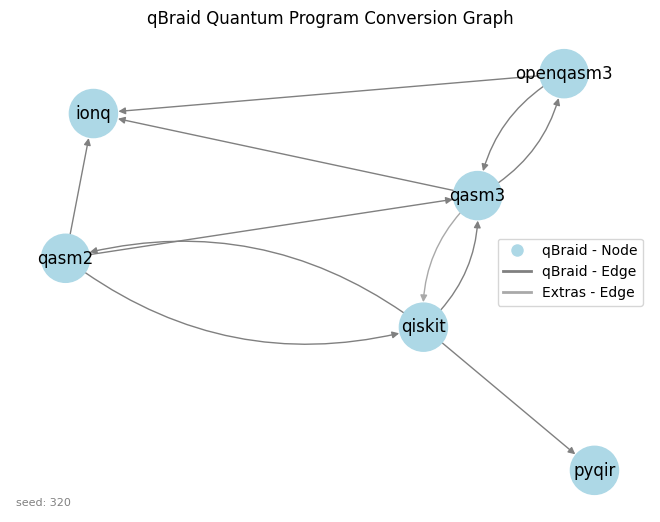

In [20]:
from qbraid import ConversionGraph

graph = ConversionGraph()

len(graph.nodes()) # 10
len(graph.edges()) # 25

graph.plot(legend=True)


In [21]:
from qbraid import QbraidProvider
from qbraid.visualization import plot_histogram, plot_distribution

provider = QbraidProvider()
provider.save_config()

In [22]:
devices = provider.get_devices(provider="IonQ")

print(f"{'Device ID':<15} {'Status':<10}")
print("-" * 25)

for device in devices:
    print(f"{device.id:<15} {device.status().name:<10}")

Device ID       Status    
-------------------------
ionq_simulator  ONLINE    
ionq_harmony    RETIRED   
ionq_aria_1     UNAVAILABLE
ionq_aria_2     UNAVAILABLE
ionq_forte_1    ONLINE    


In [23]:
device = provider.get_device("ionq_simulator")

In [24]:
device.num_qubits

29

In [25]:
device.profile.noise_models

NoiseModelSet(['aria-1', 'harmony', 'ideal'])

In [26]:
# GHZ state as an OpenQASM 2 string.
# Note: no measurement gates are included.

file = open("test.qasm")
content  = file.read()
# convert openqasm2 to qiskit

from qiskit import QuantumCircuit, transpile
from qiskit_ionq import IonQProvider, ErrorMitigation

providerIonq = IonQProvider()
simulator_backend = providerIonq.get_backend("ionq_simulator")

In [ ]:
# convert qiskit to qasm3
import qiskit.qasm3 as qasm3
from qbraid import transpile as transpileQB
qiskit_qc = transpileQB(content, 'qiskit')

transpiled_circuit = transpile(qiskit_qc, simulator_backend)
print(transpiled_circuit)
test  = qasm3.dumps(transpiled_circuit)
print(test)


In [50]:
from qbraid import __version__

print(__version__)

0.8.9


In [51]:
from qbraid.passes.qasm.compat import replace_gate_name

In [52]:
new_qasm = replace_gate_name(test, "p", "z")

In [54]:
new_qasm = test.replace("p(", "z(")

In [55]:
print(new_qasm)

OPENQASM 3.0;
include "stdgates.inc";
bit[1] c;
qubit[2] q;
z(0.0011264255744585228) q[0];
ry(-pi/2) q[1];
rz(-2.381216039459342) q[1];
cx q[1], q[0];
z(-0.0011264255744602991) q[0];
cx q[1], q[0];
ry(-pi/2) q[0];
rz(3.1413365762294703) q[0];
cx q[1], q[0];
z(0.000256077360321072) q[0];
cx q[1], q[0];
z(-0.00025607736032284834) q[0];
cx q[1], q[0];
z(0.000256077360321072) q[0];
cx q[1], q[0];
ry(-pi/2) q[0];
rz(-3.1404662280153337) q[0];
cx q[1], q[0];
z(-0.0011264255744602991) q[0];
cx q[1], q[0];
z(0.0011264255744585228) q[0];
cx q[1], q[0];
z(-0.0011264255744602991) q[0];
cx q[1], q[0];
ry(-pi/2) q[0];
rz(3.1413365762294703) q[0];
cx q[1], q[0];
z(0.000256077360321072) q[0];
cx q[1], q[0];
z(-0.00025607736032284834) q[0];
cx q[1], q[0];
z(0.000256077360321072) q[0];
cx q[1], q[0];
ry(-pi/2) q[0];
rz(-3.1404662280153337) q[0];
cx q[1], q[0];
z(-0.0011264255744602991) q[0];
cx q[1], q[0];
z(0.0011264255744585228) q[0];
cx q[1], q[0];
z(-0.0011264255744602991) q[0];
cx q[1], q[0];
ry(-

In [ ]:
test2 = transpileQB(content,'ionq')
print(test2)

In [58]:
from qbraid import transpile

ionq_dict = transpile(new_qasm, "ionq")

In [60]:
device.set_options(transpile=False, validate=False)

In [ ]:
from qbraid.programs import ProgramSpec



In [61]:
job = device.run(ionq_dict, shots=1000)

ProgramTypeError: Could not find a target ProgramSpec matching the alias 'ionq'.

In [ ]:
job.status()

In [15]:
job.wait_for_final_state()

result = job.result()

result.details

{'status': 'COMPLETED',
 'statusText': 'job has successfully run',
 'shots': 1000,
 'experimentType': <ExperimentType.GATE_MODEL: 'gate_model'>,
 'queuePosition': None,
 'timeStamps': {'createdAt': datetime.datetime(2024, 12, 9, 21, 34, 58),
  'endedAt': datetime.datetime(2024, 12, 9, 21, 35),
  'executionDuration': 13},
 'tags': {'errorMitigationDebias': False},
 'cost': Credits('0'),
 'schemaHeader': {'name': 'qbraid.runtime.schemas.job', 'version': 1.0},
 'metadata': {'openQasm': 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[3];\nh q[0];\ncx q[0],q[1];\ncx q[1],q[2];',
  'circuitNumQubits': 3,
  'circuitDepth': 3}}

In [16]:
counts = result.data.get_counts()
probabilities = result.data.get_probabilities()

print(f"Measurement Counts: {counts}")
print(f"Probabilities: {probabilities}")

Measurement Counts: {'000': 500, '111': 500}
Probabilities: {'000': 0.5, '111': 0.5}


In [ ]:
plot_distribution(counts, title="Ideal Simulator Job Result - GHZ State")

In [ ]:
# OpenQASM 2 string with IonQ native gates

qasm_ionq_native = """
OPENQASM 2;
include "qelib1.inc";
qreg q[3];

gpi(0.5) q[0];
gpi2(0.5) q[1];
ms(0, 0.5) q[1], q[2];
"""

In [ ]:
job = device.run(qasm_ionq_native, shots=1000, noise_model="aria-1")

In [ ]:
job.wait_for_final_state()

result = job.result()

In [ ]:
counts = result.data.get_counts(decimal=True)

print(f"Counts: {counts}")

In [ ]:
plot_histogram(counts, title="Aria-1 Noise Model Simulator Job Result - Native Gates")

In [ ]:
# device = provider.get_device("ionq_aria_2")

# job = device.run(qasm, shots=100, error_mitigation={"debias": False})